In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv(r"data.tsv", delimiter = '\t', quoting = 3)

In [6]:
data.shape

(3150, 5)

In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [9]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [10]:
#has a null at verified review
#handle null
data[data['verified_reviews'].isna()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [13]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [32]:
rate=pd.DataFrame(data['rating'].value_counts())
rate

,count
rating,
5,2286
4,455
1,161
3,152
2,95


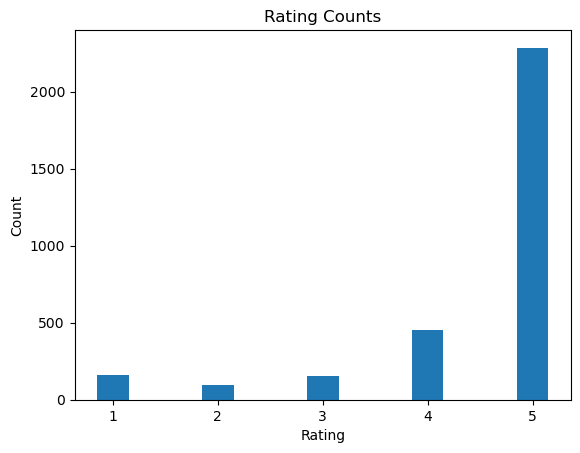

In [31]:
plt.bar(rate.index, rate['count'], width=0.3)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Counts')
plt.show()

In [41]:
sumrate=rate['count'].sum()
rate['percentage']=[(i/sumrate)*100 for i in rate['count']]
rate

,count,percentage
rating,,
5,2286,72.594474
4,455,14.449031
1,161,5.112734
3,152,4.826929
2,95,3.016831


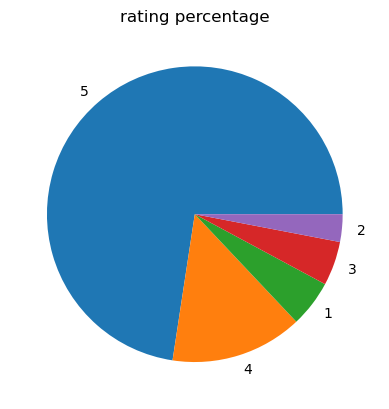

In [44]:
plt.pie(rate['percentage'],labels=rate.index)
plt.title('rating percentage')
plt.show()

In [50]:
feedback=pd.DataFrame(data['feedback'].value_counts())
feedback

,count
feedback,
1,2893
0,256


In [47]:
feedbad=data[data['feedback'] == 0].iloc[1]['verified_reviews']
feedgood=data[data['feedback'] == 1].iloc[1]['verified_reviews']

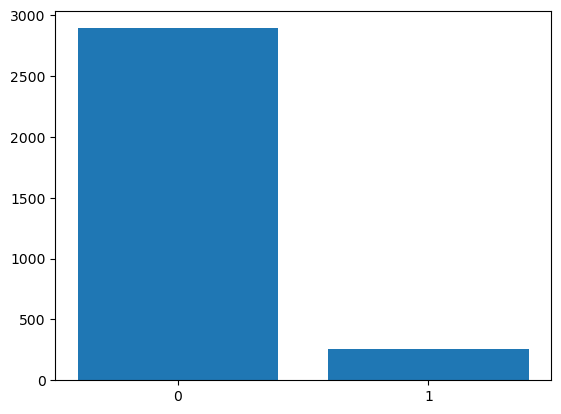

In [64]:
plt.bar(['0','1'],feedback['count'])
plt.show()

In [68]:
sumfeed=feedback['count'].sum()
feedback['percentage']=[(i/sumfeed)*100 for i in feedback['count']]
feedback

,count,percentage
feedback,,
1,2893,91.870435
0,256,8.129565


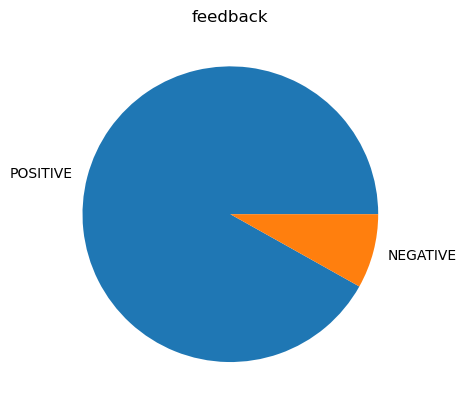

In [76]:
plt.pie(feedback['percentage'],labels=['POSITIVE','NEGATIVE'])
plt.title("feedback")
plt.show()

In [77]:
#POSITIVE ratings
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [78]:
#NEGAVITE ratings
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [84]:
variations=pd.DataFrame(data['variation'].value_counts())
variations

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


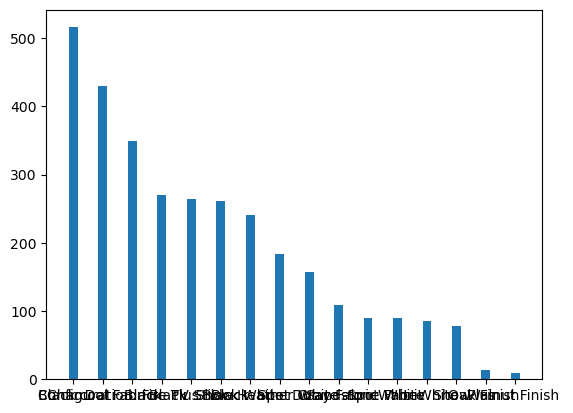

In [89]:
plt.bar(variations.index,variations['count'],width=0.3)
plt.show()

In [90]:
sumvar=variations['count'].sum()
variations['percentage']=[(i/sumvar)*100 for i in variations['count']]
variations

,count,percentage
variation,,
Black Dot,516,16.386154
Charcoal Fabric,430,13.655129
Configuration: Fire TV Stick,350,11.114640
Black Plus,270,8.574151
Black Show,265,8.415370
Black,261,8.288346
Black Spot,241,7.653223
White Dot,184,5.843125
Heather Gray Fabric,157,4.985710


In [94]:
variations['ratings']=data.groupby('variation')['rating'].mean()
variations

,count,percentage,ratings
variation,,,
Black Dot,516,16.386154,4.453488
Charcoal Fabric,430,13.655129,4.730233
Configuration: Fire TV Stick,350,11.114640,4.591429
Black Plus,270,8.574151,4.370370
Black Show,265,8.415370,4.490566
Black,261,8.288346,4.233716
Black Spot,241,7.653223,4.311203
White Dot,184,5.843125,4.423913
Heather Gray Fabric,157,4.985710,4.694268


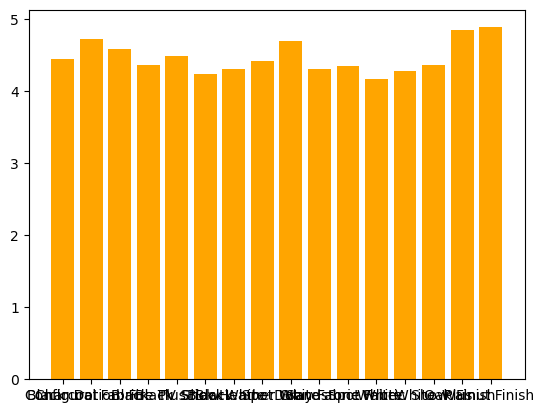

In [102]:
plt.bar(variations.index,variations['ratings'],color='orange')
plt.show()

In [106]:
data['length'] = data['verified_reviews'].apply(len)
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

Text(0, 0.5, 'Frequency')

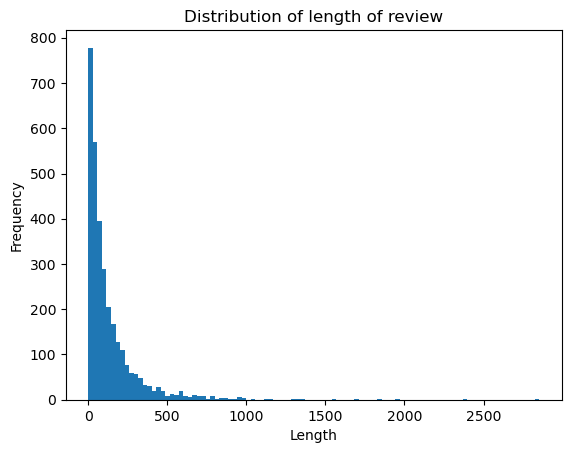

In [111]:
plt.hist(data['length'], bins=100)
plt.title('Distribution of length of review')
plt.xlabel('Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

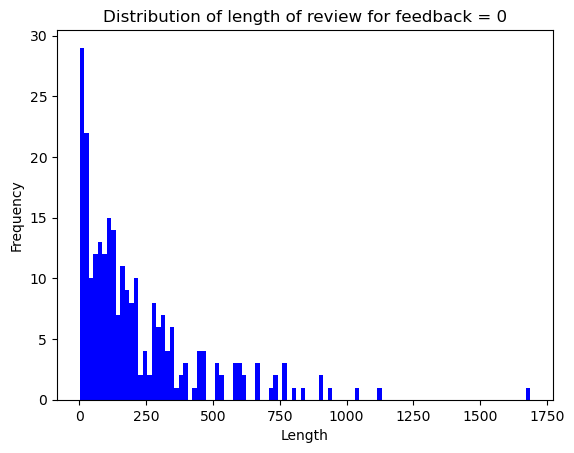

In [117]:
lenfeed0=data[data['feedback'] == 0]['length']
plt.hist(lenfeed0, bins=100, color='blue')
plt.title('Distribution of length of review for feedback = 0')
plt.xlabel('Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

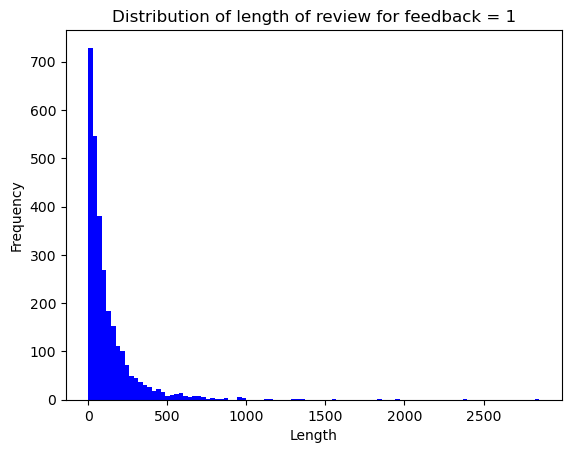

In [118]:
lenfeed1=data[data['feedback'] == 1]['length']
plt.hist(lenfeed1, bins=100, color='blue')
plt.title('Distribution of length of review for feedback = 1')
plt.xlabel('Length')
plt.ylabel('Frequency')

In [119]:
lenrate=data.groupby('length')['rating'].mean()
lenrate

length
1       3.716049
2       5.000000
3       4.000000
4       4.785714
5       4.823529
          ...   
1688    2.000000
1835    3.000000
1956    3.000000
2395    5.000000
2853    5.000000
Name: rating, Length: 495, dtype: float64

In [129]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

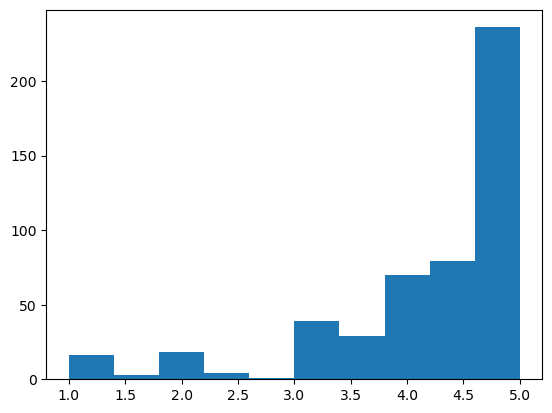

In [121]:
plt.hist(lenrate)
plt.show()

In [131]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data['verified_reviews'])
reviews = " ".join([review for review in data['verified_reviews']])
wc = WordCloud(background_color='black', max_words=50)

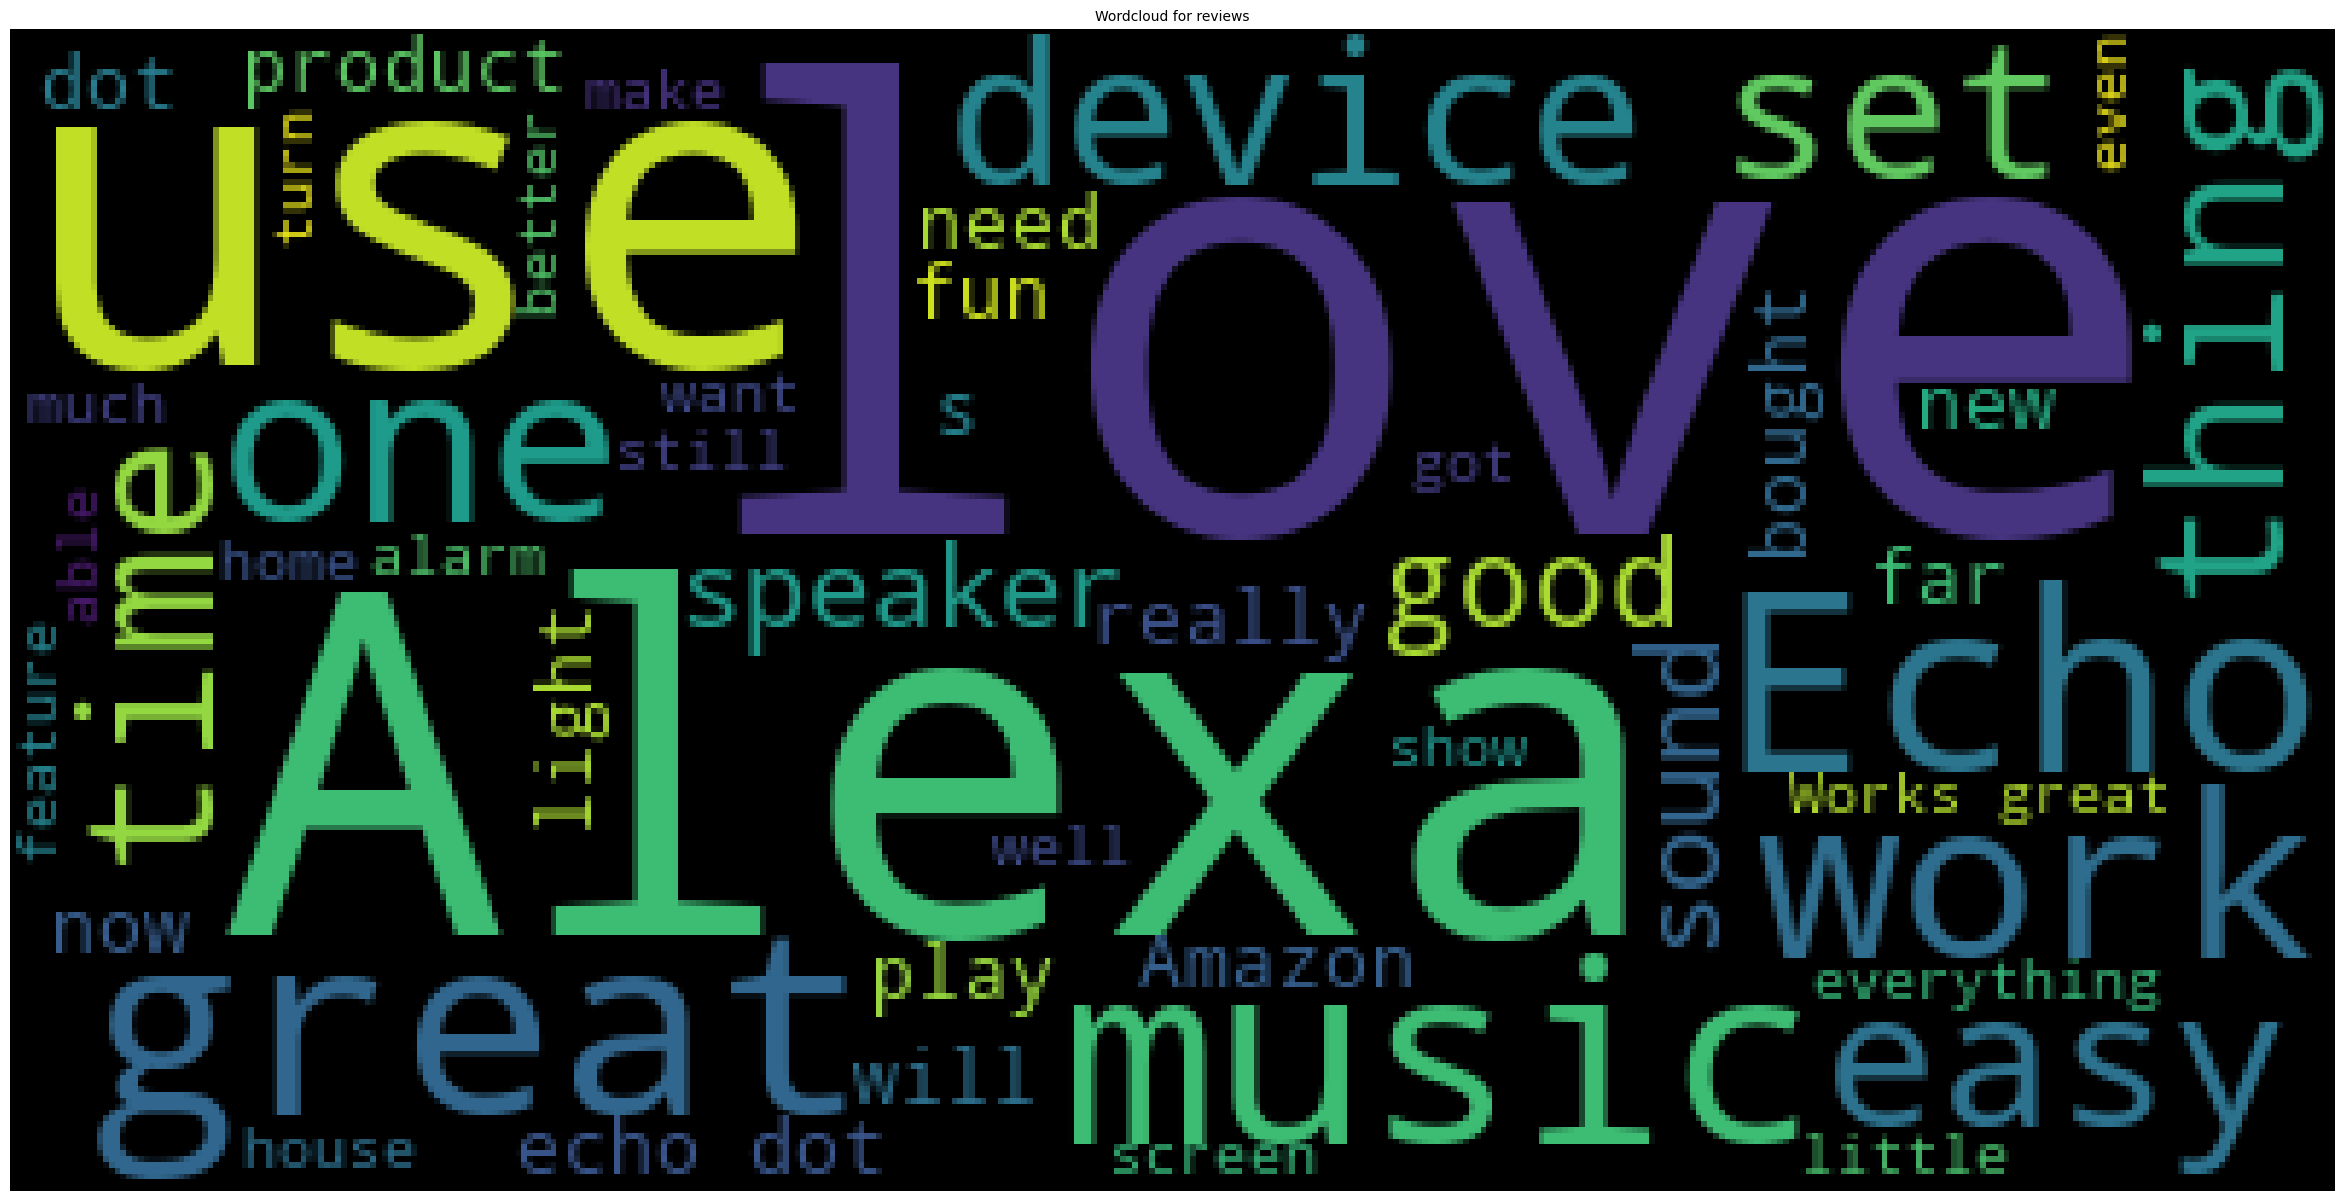

In [132]:
plt.figure(figsize=(30,30))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for reviews', fontsize=10)
plt.axis('off')
plt.show()

In [133]:
#negitive review count
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()
pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

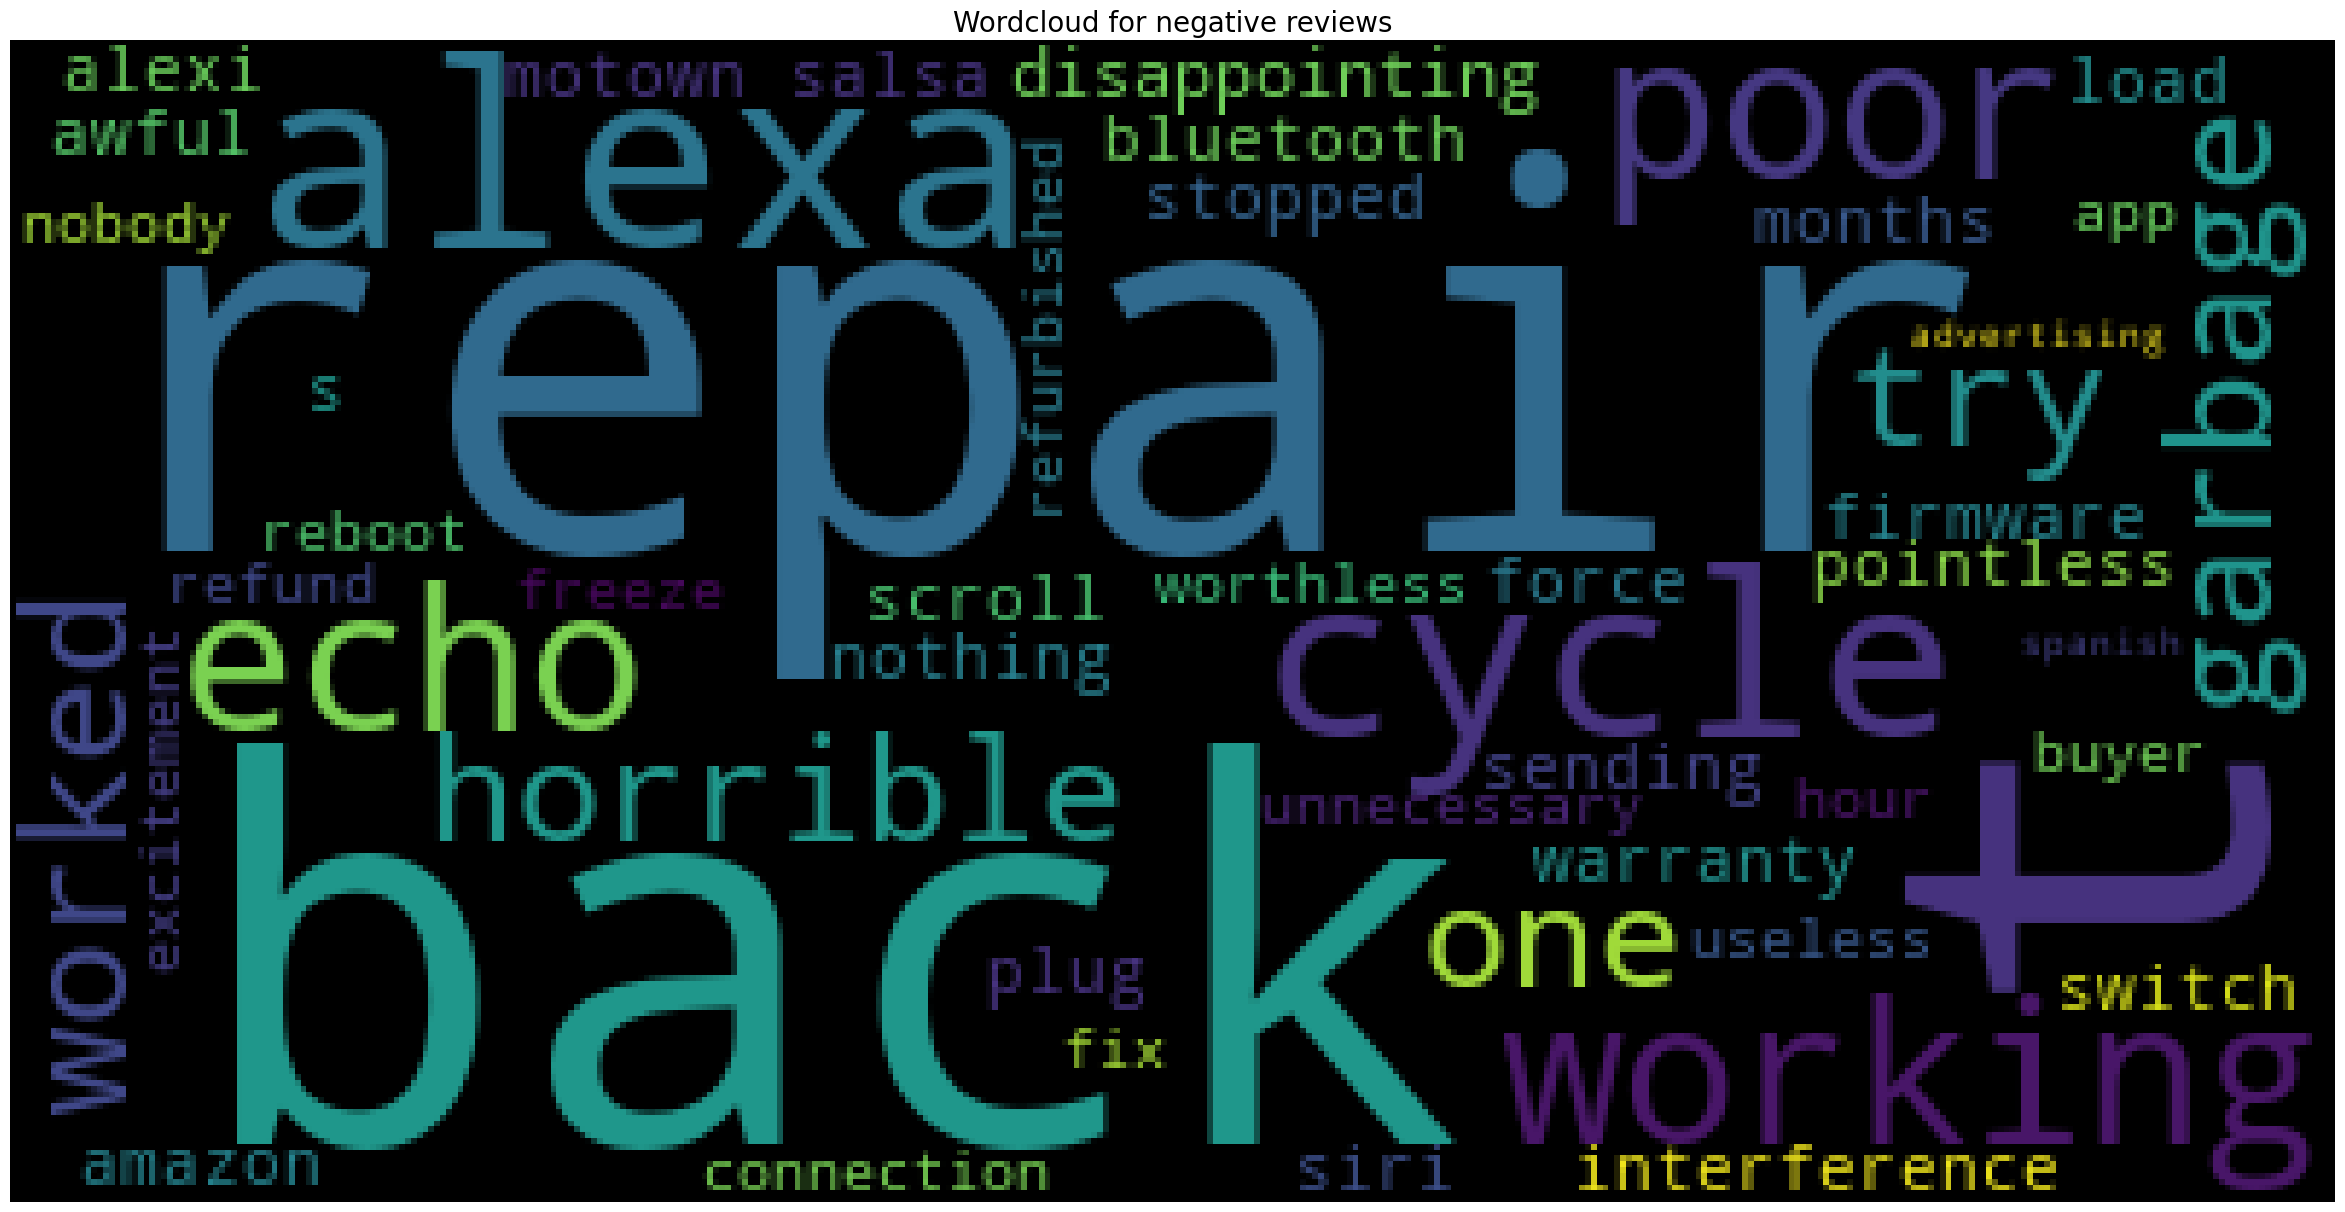

In [138]:
wc = WordCloud(background_color='black', max_words=50)
plt.figure(figsize=(30,30))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=20)
plt.axis('off')
plt.show()

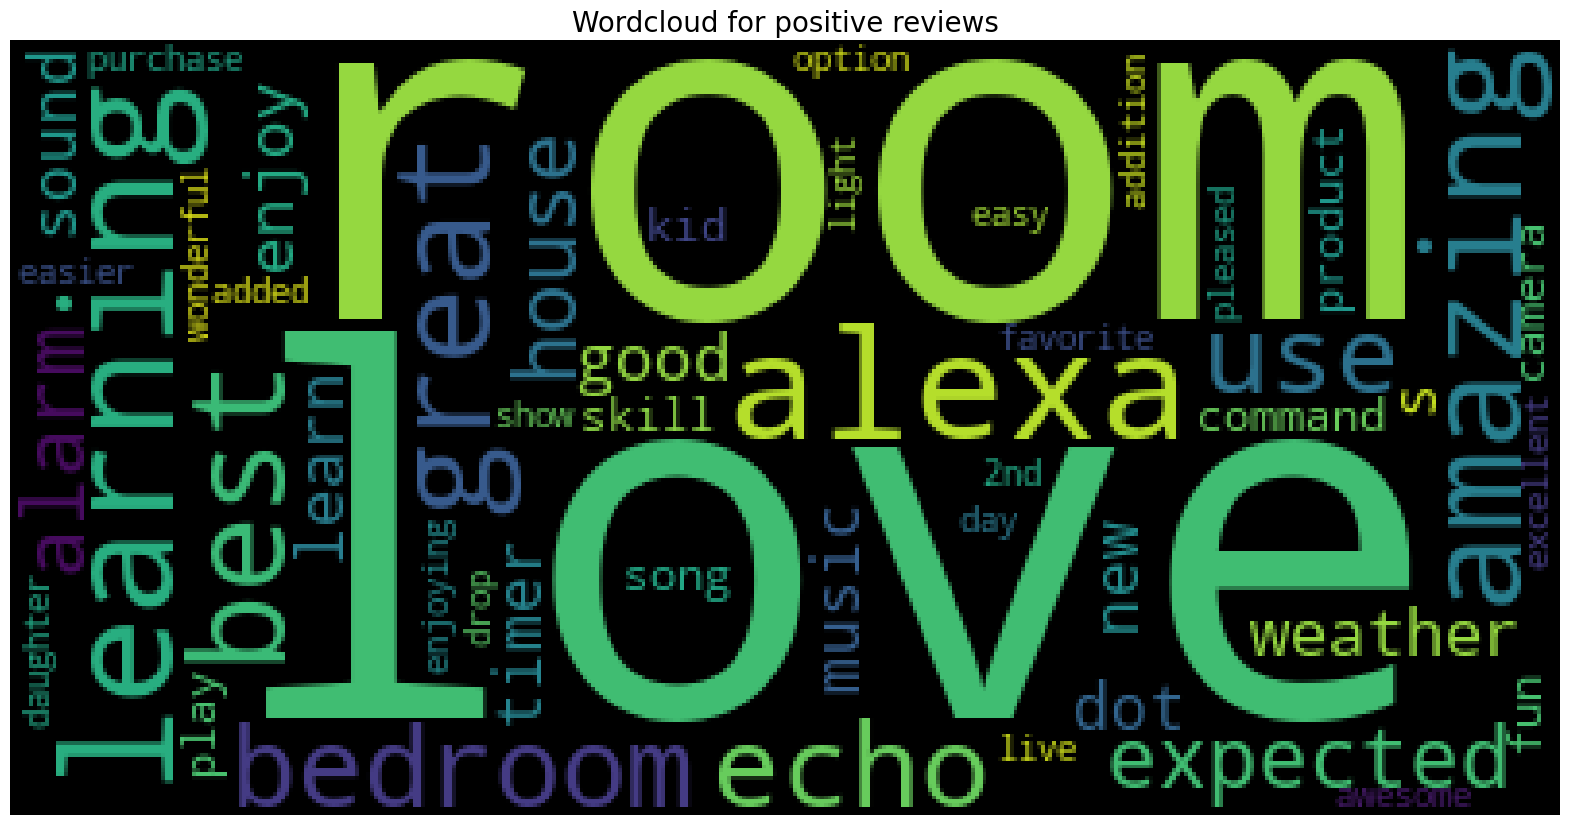

In [137]:
wc = WordCloud(background_color='black', max_words=50)
plt.figure(figsize=(20,20))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=20)
plt.axis('off')
plt.show()

In [141]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jahna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [142]:
cor = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  cor.append(review)

In [143]:
cv = CountVectorizer(max_features = 2500)
input = cv.fit_transform(cor).toarray()
output= data['feedback'].values

In [144]:
import pickle

In [146]:
pickle.dump(cv, open('cv.pkl', 'wb'))

In [148]:
input.shape,output.shape

((3149, 2500), (3149,))

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(input,output, test_size = 0.3, random_state = 15)

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [156]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
model=RandomForestClassifier()
model.fit(x_train_s,y_train)

RandomForestClassifier()

In [167]:
y_predict= model.predict(x_test_s)

In [169]:
model.score(x_test_s,y_test)

0.9428571428571428

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [172]:
cm = confusion_matrix(y_test, y_predict)

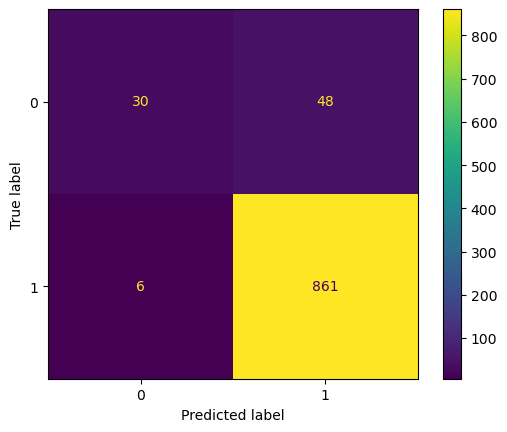

In [174]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cm_display.plot()
plt.show()